In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('D:\Downloads\iris.csv')
df.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df.drop(columns='Class',axis=1)
print(X)
Y = df['Class']
print(Y)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: objec

In [18]:
iris_data = pd.get_dummies(df)
iris_data

,sepal length,sepal width,petal length,petal width,Class_Iris-setosa,Class_Iris-versicolor,Class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


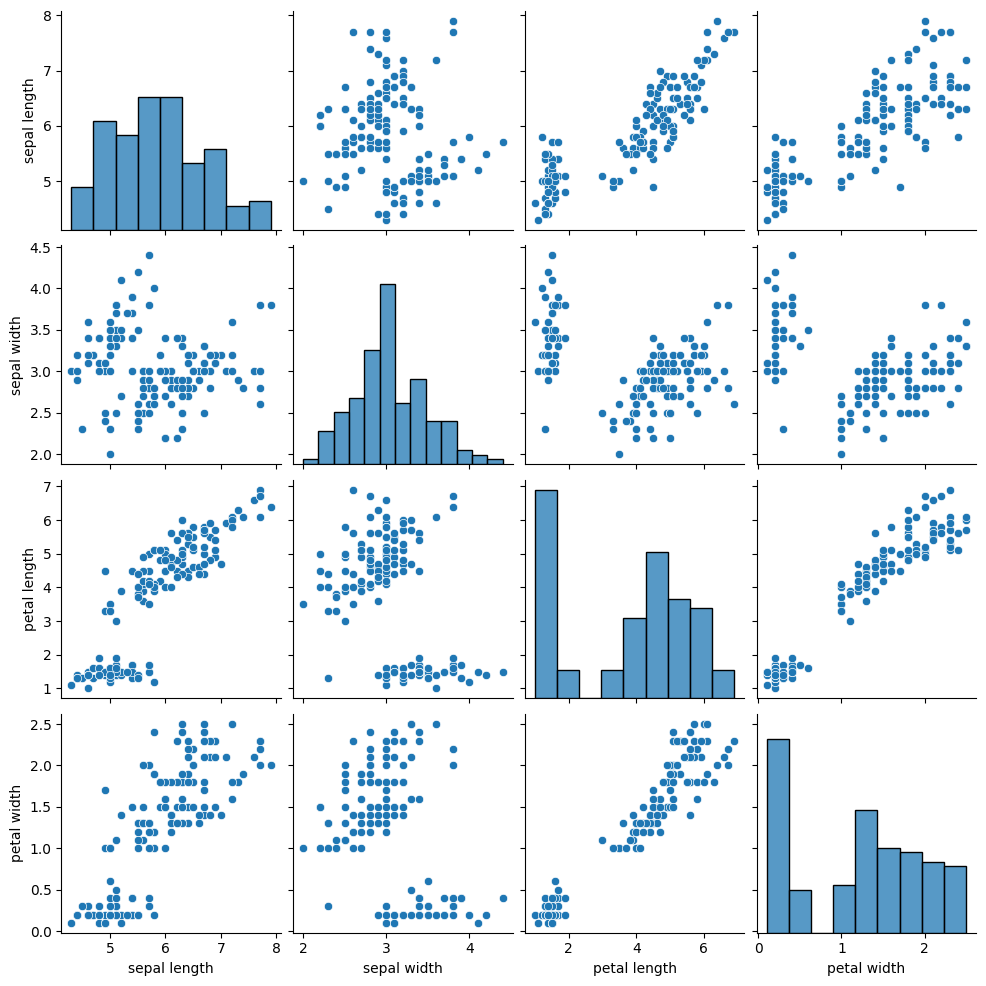

In [15]:
import seaborn as sns
sns.pairplot(X)

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scalar = StandardScaler()
scalar.fit(X)
scaled_data = scalar.transform(X)
scaled_data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(150, 2)

<AxesSubplot: >

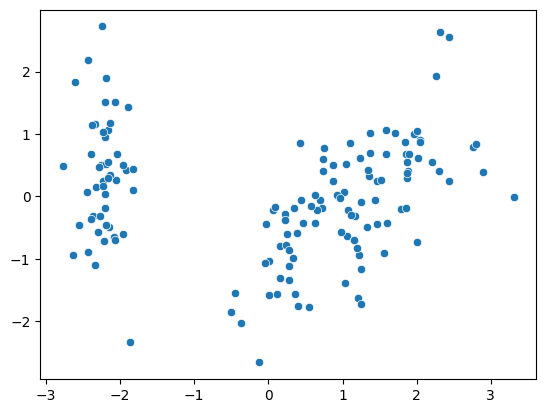

In [26]:
pc1_values = x_pca[:,0]
pc2_values = x_pca[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

In [9]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

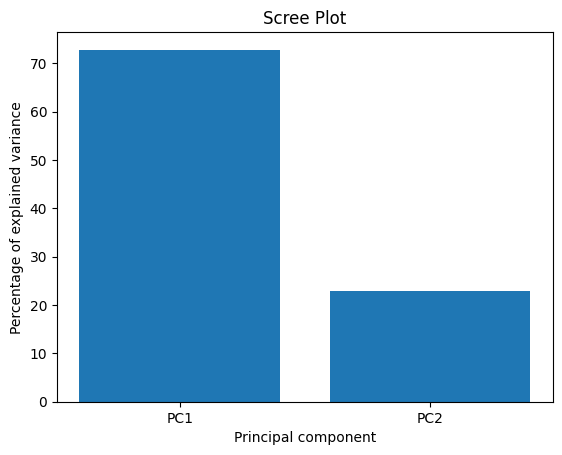

In [11]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height = per_var, tick_label = labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal component')
plt.title('Scree Plot')
plt.show()

In [12]:
pca_Df = pd.DataFrame(data = x_pca, columns = ['PC1','PC2'])
pca_Df.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [13]:
final_Df = pd.concat([pca_Df,df['Class']],axis = 1)
final_Df

,PC1,PC2,Class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


<Figure size 640x480 with 0 Axes>

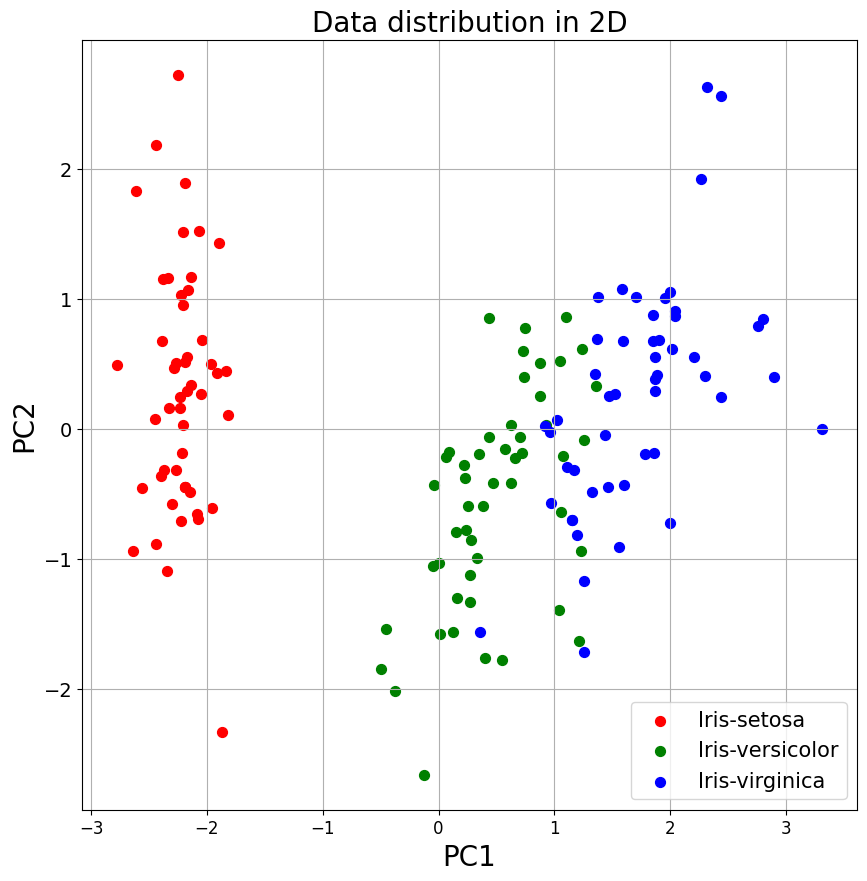

In [14]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title('Data distribution in 2D', fontsize = 20)
targets = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['r','g','b']
for target, color in zip(targets, colors):
    indicesToKeep = final_Df['Class'] == target
    plt.scatter(final_Df.loc[indicesToKeep, 'PC1'], final_Df.loc[indicesToKeep
                             ,'PC2'], c = color, s = 50)
plt.legend(targets, prop = {'size':15})
plt.grid(True)

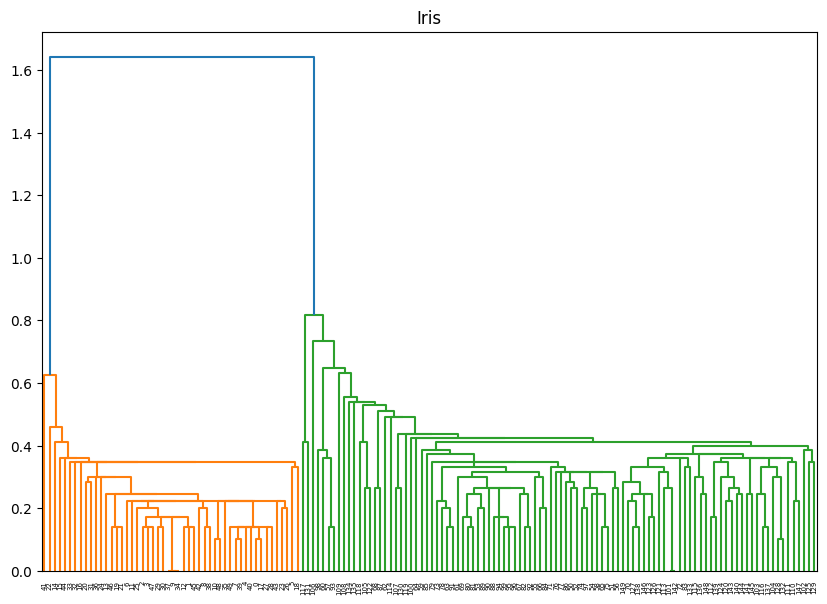

In [25]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Iris")
clusters = shc.linkage(X, method='single',metric = 'euclidean')
shc.dendrogram(clusters)
plt.show()

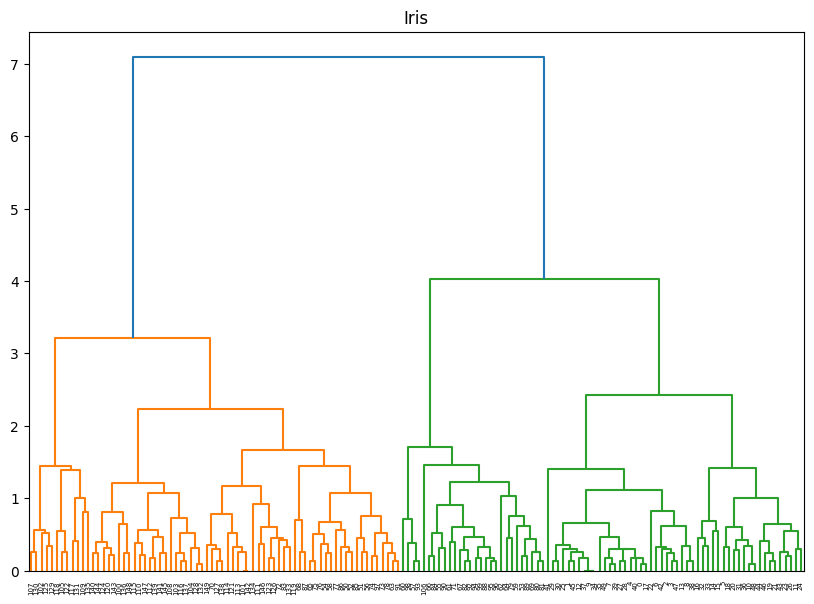

In [22]:
plt.figure(figsize=(10,7))
plt.title("Iris")
clusters1 = shc.linkage(X, method='complete',metric = 'euclidean')
shc.dendrogram(clusters1)
plt.show()

Text(0.5, 1.0, 'Labeled iris data reduced with PCA')

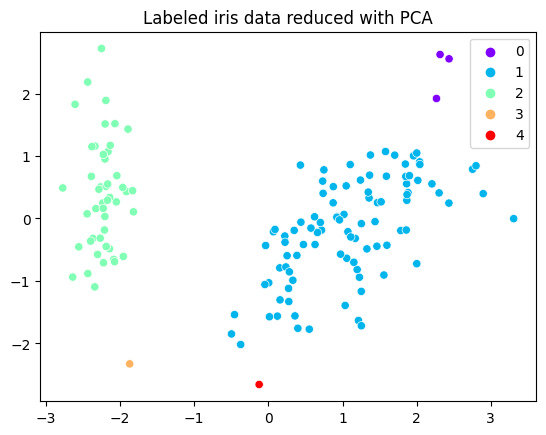

In [32]:
from sklearn.cluster import AgglomerativeClustering
cluster_pca = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
cluster_pca.fit(x_pca)
data_pca = cluster_pca.labels_
sns.scatterplot(x=pc1_values, y =pc2_values, hue = data_pca,
                palette='rainbow').set_title('Labeled iris data reduced with PCA')